## ISA Create - Sample Assay Plan as a Graph: Mass Spectrometry
Here I am showing how from a JSON-like dictionary describing an MS experiment you can create a full SampleAssayPlan as a graph and visualize how this looks like


In [1]:
from isatools.model import *
from isatools.create.models import *

In [2]:
%matplotlib inline

Here we define the structure of our sampling and assay plan, using a Python dictionary. From it we create a full `isatools.create.models.SampleAssayPlan` object

In [3]:
ms_assay_dict = OrderedDict([
            ('sample', [
                {
                    'node_type': SAMPLE,
                    'characteristics_category': 'organism part',
                    'characteristics_value': 'liver',
                    'size': 1,
                    'technical_replicates': None,
                    'is_input_to_next_protocols': True
                },
                {
                    'node_type': SAMPLE,
                    'characteristics_category': 'organism part',
                    'characteristics_value': 'blood',
                    'size': 5,
                    'technical_replicates': None,
                    'is_input_to_next_protocols': True
                },
                {
                    'node_type': SAMPLE,
                    'characteristics_category': 'organism part',
                    'characteristics_value': 'heart',
                    'size': 1,
                    'technical_replicates': None,
                    'is_input_to_next_protocols': True
                }
            ]),
            ('extraction', {}),
            ('extract', [
                {
                    'node_type': SAMPLE,
                    'characteristics_category': 'extract type',
                    'characteristics_value': 'polar fraction',
                    'size': 1,
                    'technical_replicates': None,
                    'is_input_to_next_protocols': True
                },
                {
                    'node_type': SAMPLE,
                    'characteristics_category': 'extract type',
                    'characteristics_value': 'lipids',
                    'size': 1,
                    'technical_replicates': None,
                    'is_input_to_next_protocols': True
                }
            ]),
            ('labelling', {}),
            ('labelled extract', [
                {
                    'node_type': SAMPLE,
                    'characteristics_category': 'labelled extract type',
                    'characteristics_value': '',
                    'size': 2,
                    'technical_replicates': None,
                    'is_input_to_next_protocols': True
                }
            ]),
            ('mass spectrometry', {
                'instrument': ['Agilent QTQF §'],
                'injection_mode': ['FIA', 'LC'],
                'acquisition_mode': ['positive mode']
            }),
            ('raw spectral data file', [
                {
                    'node_type': DATA_FILE,
                    'size': 1,
                    'technical_replicates': 2,
                    'is_input_to_next_protocols': False
                }
            ])
        ])
ms_assay_plan = SampleAndAssayPlan.from_sample_and_assay_plan_dict(ms_assay_dict)

()
isatools.create.models.ProtocolNode(id=extraction_000, name=extraction, protocol_type=OntologyAnnotation(
    term=extraction
    term_source=
    term_accession=
    comments=0 Comment objects
), uri=, description=, version=, parameter_values=[]).
isatools.create.models.ProtocolNode(id=extraction_001, name=extraction, protocol_type=OntologyAnnotation(
    term=extraction
    term_source=
    term_accession=
    comments=0 Comment objects
), uri=, description=, version=, parameter_values=[]).
isatools.create.models.ProtocolNode(id=extraction_002, name=extraction, protocol_type=OntologyAnnotation(
    term=extraction
    term_source=
    term_accession=
    comments=0 Comment objects
), uri=, description=, version=, parameter_values=[]).
()
isatools.create.models.ProtocolNode(id=labelling_000, name=labelling, protocol_type=OntologyAnnotation(
    term=labelling
    term_source=
    term_accession=
    comments=0 Comment objects
), uri=, description=, version=, parameter_values=[]).
i

The `ms_assay_plan` object is a graph. Let's which are its `nodes`.

In [6]:
nx_graph = ms_assay_plan.as_networkx_graph()
set(nx_graph.nodes)

{'extract_000_000',
 'extract_000_001',
 'extract_000_002',
 'extract_001_000',
 'extract_001_001',
 'extract_001_002',
 'extraction_000',
 'extraction_001',
 'extraction_002',
 'labelled extract_000_000',
 'labelled extract_000_001',
 'labelled extract_000_002',
 'labelled extract_000_003',
 'labelled extract_000_004',
 'labelled extract_000_005',
 'labelling_000',
 'labelling_001',
 'labelling_002',
 'labelling_003',
 'labelling_004',
 'labelling_005',
 'mass spectrometry_000',
 'mass spectrometry_001',
 'mass spectrometry_002',
 'mass spectrometry_003',
 'mass spectrometry_004',
 'mass spectrometry_005',
 'raw spectral data file_000_000',
 'raw spectral data file_000_001',
 'raw spectral data file_000_002',
 'raw spectral data file_000_003',
 'raw spectral data file_000_004',
 'raw spectral data file_000_005',
 'raw spectral data file_000_006',
 'raw spectral data file_000_007',
 'raw spectral data file_000_008',
 'raw spectral data file_000_009',
 'raw spectral data file_000_010',


Here we print the `links` or `edges` of the graph

In [8]:
set(nx_graph.edges)

{('extract_000_000', 'labelling_000'),
 ('extract_000_001', 'labelling_001'),
 ('extract_000_002', 'labelling_002'),
 ('extract_001_000', 'labelling_003'),
 ('extract_001_001', 'labelling_004'),
 ('extract_001_002', 'labelling_005'),
 ('extraction_000', 'extract_000_000'),
 ('extraction_000', 'extract_001_000'),
 ('extraction_001', 'extract_000_001'),
 ('extraction_001', 'extract_001_001'),
 ('extraction_002', 'extract_000_002'),
 ('extraction_002', 'extract_001_002'),
 ('labelled extract_000_000', 'mass spectrometry_000'),
 ('labelled extract_000_001', 'mass spectrometry_001'),
 ('labelled extract_000_002', 'mass spectrometry_002'),
 ('labelled extract_000_003', 'mass spectrometry_003'),
 ('labelled extract_000_004', 'mass spectrometry_004'),
 ('labelled extract_000_005', 'mass spectrometry_005'),
 ('labelling_000', 'labelled extract_000_000'),
 ('labelling_001', 'labelled extract_000_001'),
 ('labelling_002', 'labelled extract_000_002'),
 ('labelling_003', 'labelled extract_000_003')

We output is as a `networkx` graph and we visualize it using `matplotlib`

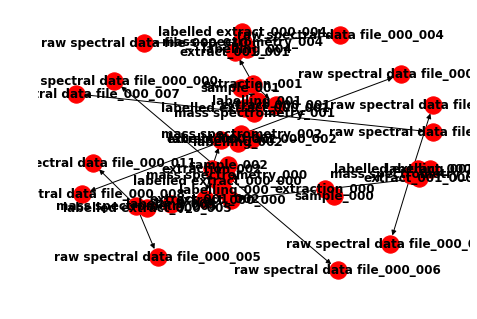

In [5]:
import networkx as nx
nx.draw(nx_graph, with_labels=True, font_weight='bold')